# Goal 
This assignment build the following skills:
- implement two distance metrics(Euclidean and Manhattan)
- implement the `brute-force K-NN` algorithm
- implement a `cross-validation function`
- apply `scaling` to the dataset
- perform `feature selection`
- `evaluate` your model
- write a short `report`

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from math import sqrt as sqrt, fabs
import unittest as unittest
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as seaborn
from scipy import stats

## Part A: Model Code

### 1. write a function to calculate and return the Euclidean distance of two vectors (2 pts)

In [2]:
# multidimensional vectors
def eucliDistan(p1,p2):
    p11 = np.array(p1)
    p22 = np.array(p2)
    if p11.shape != p22.shape:
        print("unable to compute, vectors are in different dimensions")
    else:
        p3 = np.subtract(p11,p22)

        return sqrt(np.sum(np.square(p3)))

In [3]:
class TestEuDis(unittest.TestCase):

    def testEuDistance(self):
        #1d
        self.assertEqual(eucliDistan([1],[0]),1)
        self.assertEqual(eucliDistan([1,1],[4,5]),5)

test = TestEuDis()
test.testEuDistance()


### 2. write a function to calculate and return the Manhattan distance of two vectors (2 pts)

In [4]:
def Manhattan(p1,p2):
    # 2 np high dimensional array
    p11 = np.array(p1)
    p22 = np.array(p2)
    if p11.shape != p22.shape:
        print("unable to compute, vectors are in different dimensions")
    else:
        return np.abs(np.sum(np.subtract(p11,p22)))

In [5]:
class TestManhattan(unittest.TestCase):

    def testManhattan(self):
        #1d
       self.assertEqual(Manhattan([1,2],[5,7]),9)

test = TestManhattan()
test.testManhattan()

### 3. write a function to calculate and return the accuracy and generalization error of two vectors (4 pts)

In [6]:
# accuracy = (correctly predicted + no correctly predicted) / total predictions
# Generalization error = 1 - accuracy
def getAccuacy_and_GenError(total_predicts,yes,no):
    accuracy = (yes+no)/total_predicts
    generror = 1 - accuracy
    return (accuracy,generror)


# get the value out of tuple:
# e.g. (0,1,2)
# t = (0,1,2)
# a, b, c = t  or a, b, c = (0,1,2)
# print(a)
# print(b)
# print(c)

In [7]:
class testGetAccuracy_and_error(unittest.TestCase):

    def testGetAccuracy_and_error(self):
        total = 100.0
        yes = 30.0
        no = 50.0
        (accuacy,generror) = getAccuacy_and_GenError(total,yes,no)
        self.assertEqual(round(accuacy,2),0.8)
        self.assertEqual(round(generror,2),0.2)

test = testGetAccuracy_and_error()
test.testGetAccuracy_and_error()

### 4. write 3 functions to compute: precision, recall and F1 score (6 pts)

In [8]:
'''
True positive(tp): correctly classified or detected.
False positive(fp): incorrectly classified or detected. (type I error)
False negative(fn): incorrectly rejected. (type II error)
True negative(tn): correctly rejected. 
'''
# no need to test since it's formula on ppt
def getPrecision(n_tp,n_fp):
    # accuacy of the positive predictions
    # percentage of true positives
    pr = n_tp / (n_tp + n_fp)
    return pr
def getRecall(n_tp,n_fn):
    # (+) instance correctly detected by classifier
    rc = n_tp / (n_tp + n_fn)
    return rc
def getFoneScore(n_tp,n_fn,n_fp):
    # performance score: harmonic mean(调和平均数) of precision and recall
    F_1 = n_tp/(n_tp+(n_fn+n_fp)/2)
    return F_1

### 5. write a function to compute the confusion matrix of two vectors (4 pts)

In [9]:
def createCFmatrix(actual,predictions):
    actualNoPredictedNo = 0
    actualNoPredictedYes = 0
    actualYesPredictedNo = 0
    actualYesPredictedYes = 0

    if len(predictions) != len(actual):
        print("missing pair outputs: # predictions not corresponding # actual output!\n")
    for i in range(len(predictions)):
            if actual[i] == 0 and predictions[i] == 0:
                actualNoPredictedNo += 1
            if actual[i] == 0 and predictions[i] == 1:
                actualNoPredictedYes += 1
            if actual[i] == 1 and predictions[i] == 0:
                actualYesPredictedNo += 1
            if actual[i] == 1 and predictions[i] == 1:
                actualYesPredictedYes += 1

    return [actualNoPredictedNo,actualNoPredictedYes,actualYesPredictedNo,actualYesPredictedYes]


### 6. write a function to generate the Receiver Operating Characteristic (ROC) curve (8 pts)

In [10]:
def getROC(TP_rate,FP_rate):
    plot.plot(FP_rate,TP_rate)
    plot.ylabel('True Positive rate')
    plot.xlabel('False Positive rate')


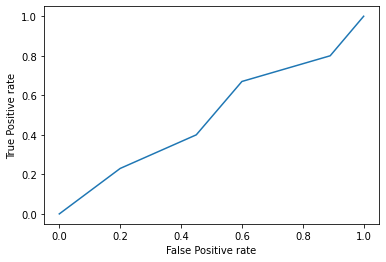

In [11]:
class testPlot(unittest.TestCase):
    FP_rate = [0.0,0.2,0.45,0.6,0.89,1.0]
    TP_rate = [0.0,0.23,0.4,0.67,0.8,1.0]
    getROC(TP_rate,FP_rate)

### 7. write a function to compute area under curve (AUC) for the ROC curve (4 pts)

In [12]:
def integralAUC_ROC(FP_rate1,FP_rate2,TP_rate):
    area = 0
    for i in range(FP_rate1,FP_rate2+1):
        area += TP_rate[i]
    return area

### 8. write a function to generate the *precision-recall* curve (10 pts)

In [13]:
def getPrecisionRecall_curve(precision,recall):
    plot.plot(precision,recall)
    plot.xlabel('precision')
    plot.ylabel('recall')


### 9. Implement a *KNN_Classifier*(OOP Python) model class. It should have the following three methods: (20 pts)

   * `fit(self,X,Y,n_neighbors,weights,kwargs)`
       * this method simply needs to store the relevant values as   instance variables. 
       * args:
           * X:ndarray
               * a numpy array with rows representing data samples and columns representing features
           * Y:ndarray
               * a 1D numpy array with labels corresponding to each row of the feature matrix X
           * n_neighbors: int
               * The number of nearest neighbors
           * weights: string, optional(default = 'uniform')
               * `uniform`: uniform weights. All points in each neighborhood are weighted equally.
               * `distance`: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
   * `predict(self,X)`
       * this method will use the instance variables stored by the `fit` method
       * args:
           * X:ndarray
               * a numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent features.
       * Returns: 
           * 1D array of predictions for each row in X.
           * the 1D array should be designed as a column vector. 
   * `_init_(self)`
       * It's a standard python initialization function so we can instantiate the class. Just "pass" this.

In [14]:
# K Nearest Neighbors
class KNN_Classifier:
    _instance = None
    def __init__(self):
        pass

    def fit(self,X,Y,n_neighbors,weights,**kwargs):
        self.__kwargs = kwargs
        self.__weights = weights
        self.__n_neighbors = n_neighbors
        self.__Y = Y #row number of feature(nd_array)
        self.__X = X #features matrix(nd_array)
        KNN_Classifier._instance = self
    
    def getX(self):
        return self.__X
    
    def getY(self):
        return self.__Y
    
    def predict(self,X):# X numpy 1 deminesional array
    # return 1D array of predictions for each row in X
    # The 1D array should be designed as a column vector
    # get the nearest n neighbor
    # earch point P: (sugar, total sulfur dioxide, wine quality)
    # X : wine data
        samplept = X[0]
        distance = np.zeros([2,2])
        neighbors = np.zeros([2,2])
        for i in range(len(X)-1):
            # calculate distance
            eu_distance = eucliDistan(samplept,X[i])
            # get neighbors
            distance[i]=[i,eu_distance]

        sorted_distance = distance[np.argsort(distance[:,1])]#should sort accord to last element
        for i in range(self.__n_neighbors):
            print(sorted_distance[i][0])
            # neighbors[i]=X[sorted_distance[i][0]]
        
# dtype = [('name', 'S10'), ('height', float), ('age', int)]
# values = [('Arthur', 1.8, 41), ('Lancelot', 1.9, 38),
#           ('Galahad', 1.7, 38)]
# a = np.array(values, dtype=dtype)       # create a structured array
# np.sort(a, order='height')



things affect wine: **sugar vs wine quality** , **sulfur vs wine quality** <br>
$\uparrow$ should done before *Sunday 8/30*

## Part B: Data Processing

### 10. Read in the `winequality-white.csv` file as a *Pandas* data frame

In [15]:
whitewineData = pd.read_csv("~/Downloads/winequality-white.csv",sep=';')
whitewineData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 11. The target will be the `quality` column which represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of
- `good` (quality > 5) 
- `bad` (quality $\leq$ 5)
### your target vector should have 0s (representing `bad` quality wine) and 1s (representing `good` quality wine)

In [16]:
goodQuality = whitewineData[whitewineData['quality'] > 5]
badQuality = whitewineData[whitewineData['quality'].isin([0,5])]
badQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0,5
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,5
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,5
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
19,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4882,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,5
4884,6.5,0.33,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.6,5
4888,6.8,0.22,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4892,6.5,0.23,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5


### 12. use the techniques from the *recitation* to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report. (3 pts)

In [17]:
whitewineData.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 13. shuffle the rows of your data. You can use `def = df.sample(frac=1)` as an idiomatic(惯用的) way to shuffle the data in Pandas without losing column names. (2 pts)

In [18]:
randomWhite = whitewineData.sample(frac=1)
randomWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
403,7.1,0.270,0.31,18.2,0.046,55.0,252.0,1.00000,3.07,0.56,8.7,5
3326,6.6,0.170,0.28,1.8,0.042,62.0,178.0,0.99204,3.15,0.42,10.2,5
2900,6.1,0.160,0.37,1.1,0.031,37.0,97.0,0.99220,3.40,0.58,10.5,6
3818,5.1,0.350,0.26,6.8,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,6
1655,7.8,0.280,0.49,1.3,0.046,27.0,142.0,0.99360,3.09,0.59,10.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
834,7.3,0.205,0.31,1.7,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
3912,6.5,0.330,0.30,3.8,0.036,34.0,88.0,0.99028,3.25,0.63,12.5,7
3748,6.2,0.240,0.25,12.5,0.055,47.0,134.0,0.99758,3.30,0.51,9.0,5
4678,6.6,0.285,0.49,11.4,0.035,57.0,137.0,0.99732,3.08,0.54,8.9,6


### 14. Generate pair plots using the seaborn package (data scientist notebook). This will be used to identify and report the redundant features, if there is any. (2 pts)

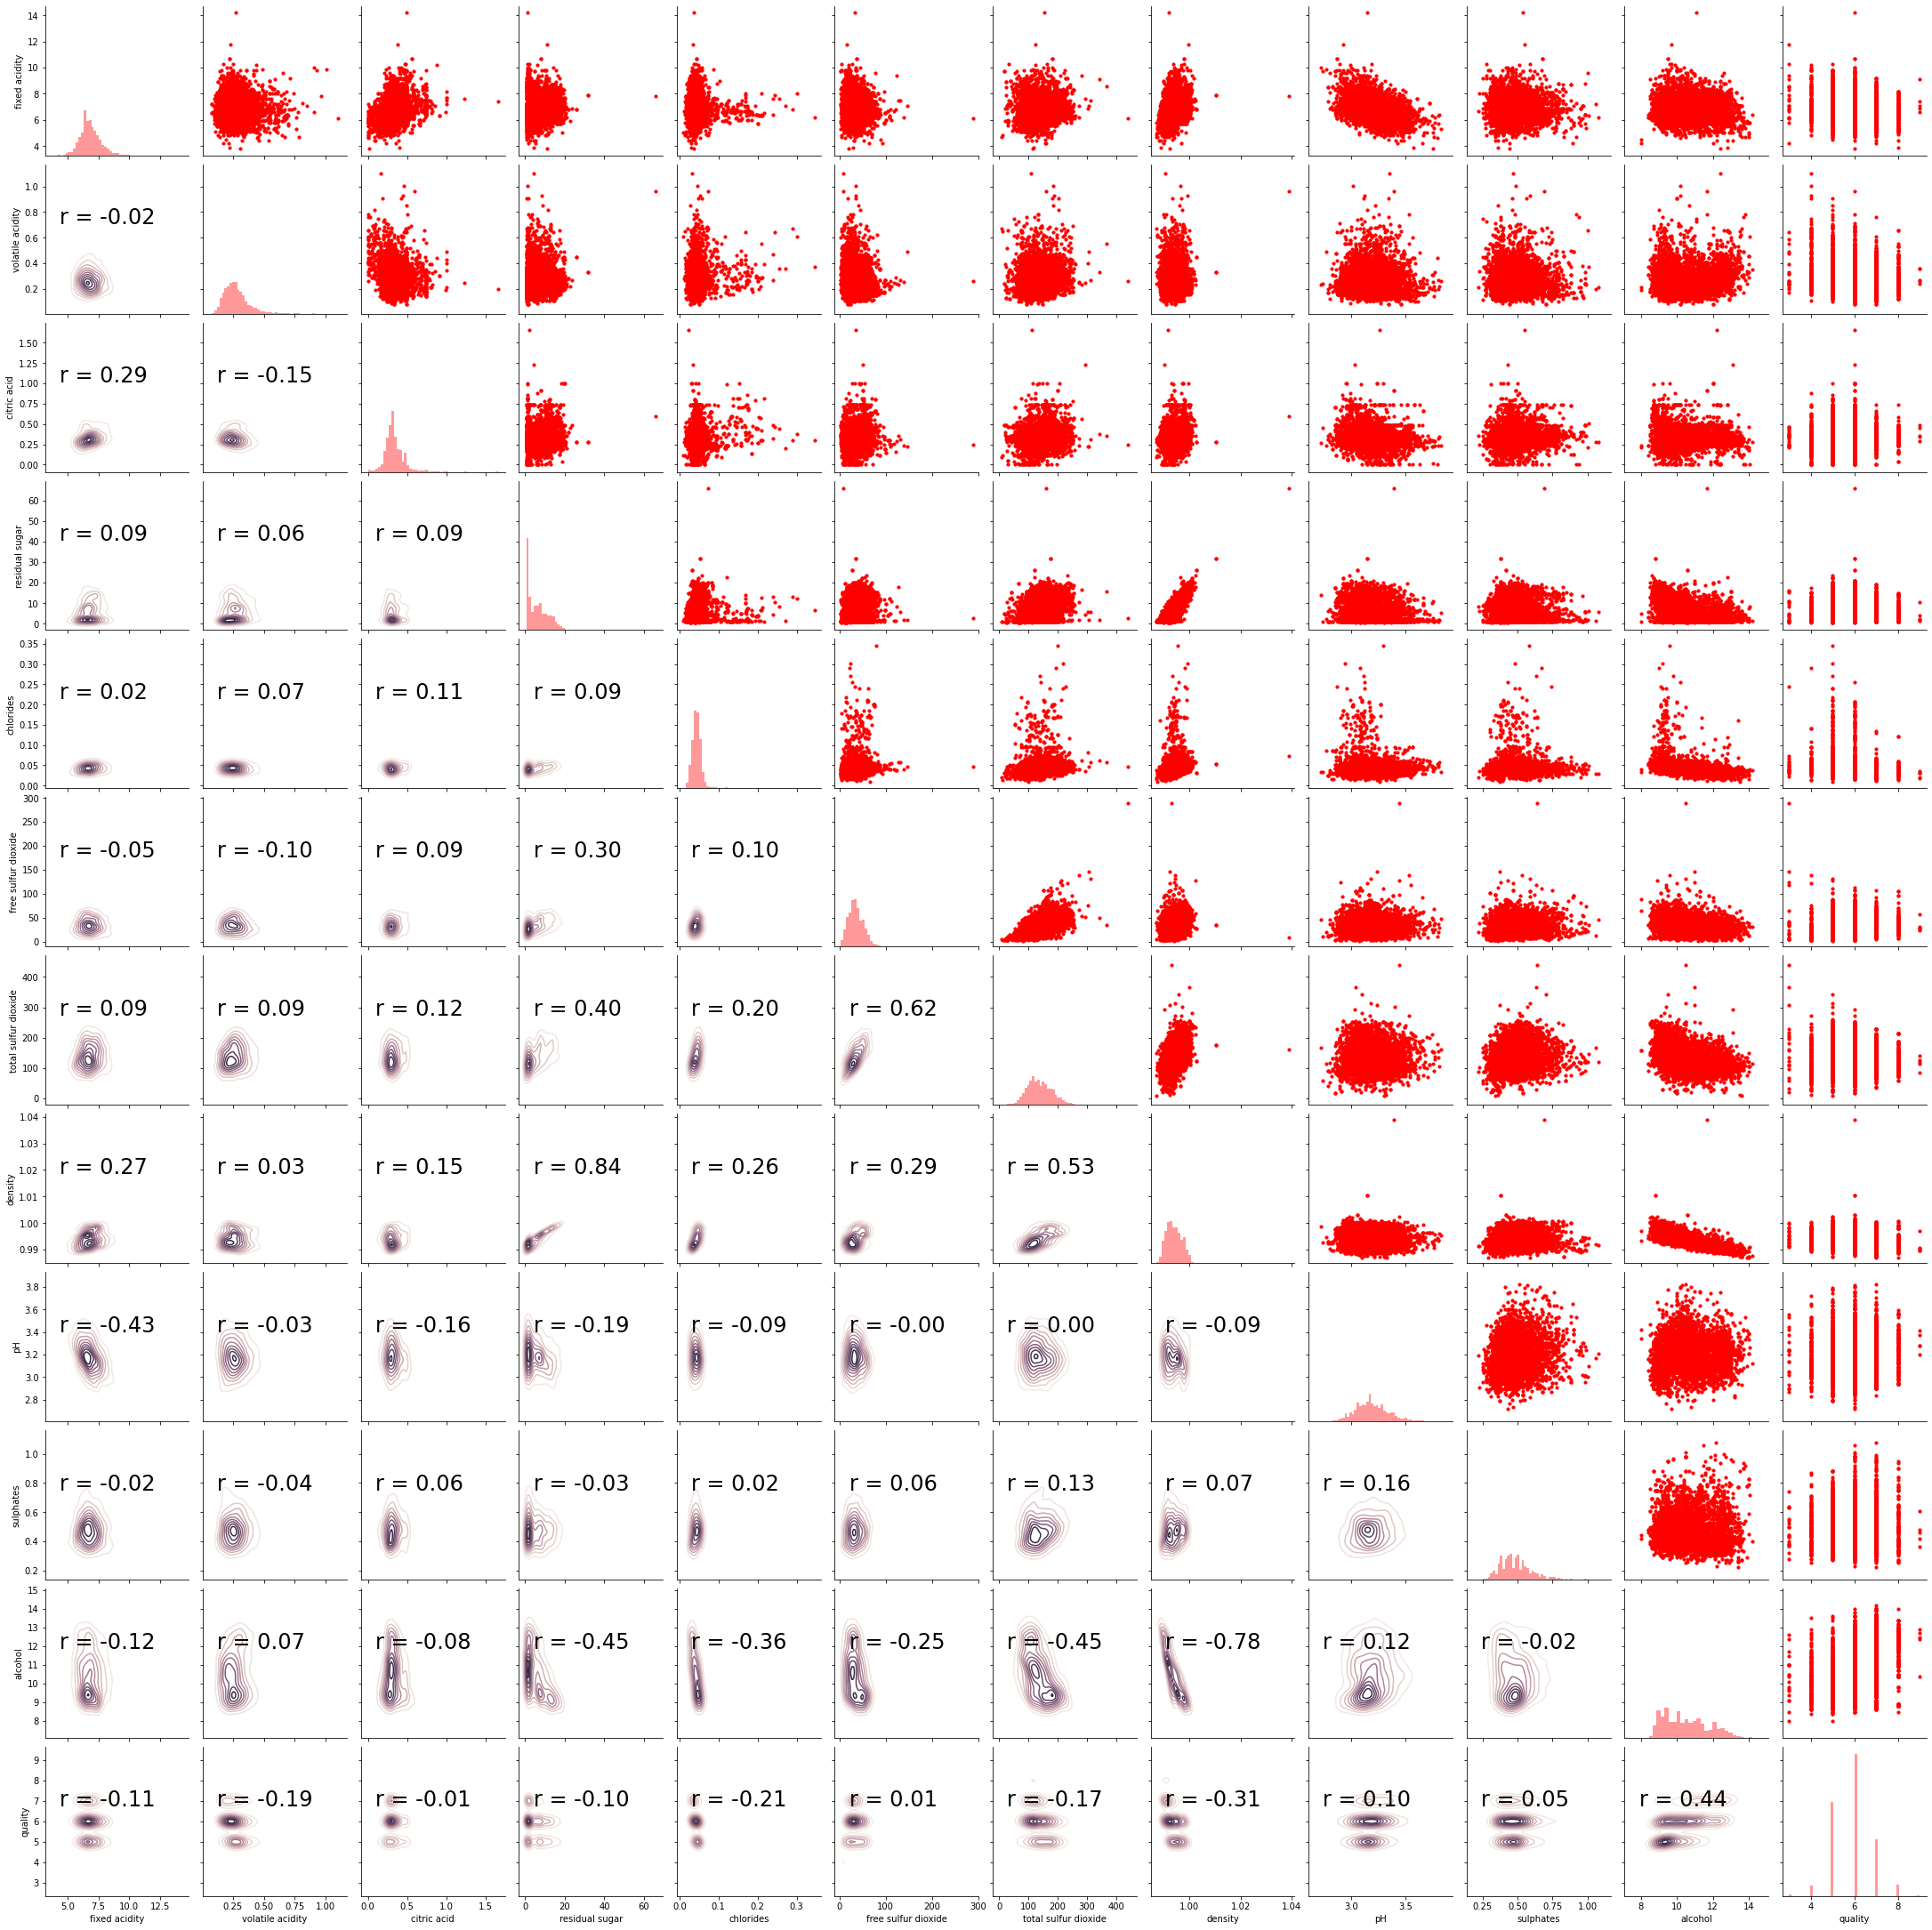

In [19]:
# Calculate correlation coefficient
def corrfunc(x,y,**kws):
    r, _ = stats.pearsonr(x,y)
    ax = plot.gca()
    ax.annotate("r = {:.2f}".format(r),xy = (.1, .6), xycoords = ax.transAxes, size = 24)

cmap = seaborn.cubehelix_palette(light = 1, dark= 0.1, hue = 0.5, as_cmap=True)
seaborn.set_context(font_scale=2)

# Pair grid set up
g = seaborn.PairGrid(randomWhite)

# Scatter plot on the upper triangle
g.map_upper(plot.scatter, s=10, color='red')

# Distribution on the diagonal
g.map_diag(seaborn.distplot,kde=False,color='red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(seaborn.kdeplot,cmap = cmap)
g.map_lower(corrfunc)


### 15. Drop the redundant features. (1 pts)

In [19]:
# Redundant features add no relevant information to
# your other features, because they are correlated
# or because they can be obtained by [linear]
# combination of other features. Having them on
# your set will not add anything, but it won't hurt
# either, information-wise.
randomWhite = pd.get_dummies(randomWhite)
most_corrolated = randomWhite.corr().abs()['quality'].sort_values(ascending=False)
most_corrolated = most_corrolated[:8]

# Edit the DataFrame to Contain Only the Most Correlated Features
# select data by row #s (.iloc)
# select data by label or by conditional statement (.loc)
# select in a hybird(mixed) apporach(.ix), now deprecated in Pandas(0.20.1)

featuretodrop = most_corrolated[most_corrolated>=0.5]
featuretodrop
# since the highly correlation col besides our target is none, we don't have to drop any redundant features

quality    1.0
Name: quality, dtype: float64

### 16. write a function named `partition` to split your data into train and test set. The function should take 3 arguments: feature matrix (numpy array with rows representing data samples and columns representing features.), target vector (numpy array with labels corresponding to each row of the feature matrix), t. Here $t$ is a real number to determine the size of partition. For example, if t is set to 0.2, then `80%` of the `data` will be used for training and `20%` for `testing`. This function should return two feature matrices for train and test data, and two target vectors for train and test data. (6 pts)

In [20]:
# t: size of partition, testing size percentage
# in: feature matrix, target vector
# return: two feature matrices for train and test data
#         two target vectors for tain and test data
# feature n x n : 7 in test case
# target n x 1 :4898 in test case
def partition(feature,target,t): #randum split
    trainingFeature = []
    trainingTarget = []
    testFeature = []
    testTarget = []
    

    for i in range(len(target[0])):
        if i < (round(len(target[0])*t)):
            trainingFeature.append(feature[0][i]) # training feature
            trainingTarget.append(target[0][i])   # training target
        else:
            testFeature.append(feature[0][i])
            testTarget.append(target[0][i])

    return trainingFeature,testFeature, trainingTarget,testTarget

### 17. Naively run your `KNN_Classifier` model on the train dataset with n_neighbors = 5 and using Euclidean distance. (6 pts)

- [ ] Use accuracy and F1 score to compare your predictions to the expected labels.
- [ ] now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.
- [ ] Re-run the `KNN_Classifier` model on the standardized data, find the accuracy and F1 score with the expected labels.
- [ ] compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment. This will go in the report
- [ ] Perform a similar test for inverse distance weighting in the `KNN_Classifier` model and determine whether or not to use it. This will go in the report. (5 pts)

In [22]:
# quality                 1.000000
# alcohol                 0.435575
# density                 0.307123
# chlorides               0.209934
# volatile acidity        0.194723
# total sulfur dioxide    0.174737
# fixed acidity           0.113663
# pH                      0.099427
feature = np.array([whitewineData["alcohol"],whitewineData["density"],whitewineData["chlorides"],whitewineData["volatile acidity"],whitewineData["total sulfur dioxide"],whitewineData["fixed acidity"],whitewineData["pH"]])#n x n
target = np.array([whitewineData["quality"]])#n x 1
t = 0.6
(trainingFeature,testFeature, trainingTarget,testTarget) = partition(feature,target,t)

classifier = KNN_Classifier()
# linear regression
#  def fit(self,X,Y,n_neighbors,weights,**kwargs)
classifier.fit(trainingFeature,trainingTarget,5,'uniform')

totalpredict = 0
yes = 0
no = 0

for i in range(len(trainingFeature)):
    trainPredicQuality = classifier.predict(np.array([trainingFeature[i]]))
    testPredicQuality = target[0][i]
    if trainPredicQuality == testPredicQuality:
        yes+=1
    else:
        no+=1
                                            
(accuracy,generlizationerror) = getAccuacy_and_GenError(totalpredict,yes,no)
print(accuracy)
print(generlizationerror)


0.0
0.0


IndexError: index 2 is out of bounds for axis 0 with size 2

-///------- due before Wed 9/2 --------///-

In [24]:
### 18.  Evaluation of an estimator performance via cross-validation: Implement the S-fold cross-validation function. (10 pts)

* sFold(folds, data, labels, model, model_args, error_fuction)
    * folds is an integer number of folds.
    * data is a `numpy array` with rows representing data samples and columns representing features.
    * labels is a numpy array with labels corresponding to each row of training_features.
    * model is an object with the fit and predict methods.
    * model args is a dictionary of arguments to pass to the classification algorithm. If you are unfamiliar, look up 
    using the `**` operator to unpack dictionaries arguments
    * error_function
        * returns error value between predicted and true labels. Ex. mean squared error (mse) function could be used as 
        error_function.
* how it should work: 
    * use a helper function to calculate an s-partition of the data(i.e., partition the data into `s` equally sized 
    portions)
    * For each partition
        * Make a model using the model class 
        * Fit the data to all other partitions(1 - folds)
        * Make prediction on current partition
        * Store expected labels and predicted labels for current partition
    * Calculate the average error (for all partitions) using the `error_function` on stored expected and predicted 
    labels.
* it should return: 
    * A python dictionary with the following elements
        * expected labels
        * predicted labels
        * average error

IndentationError: unexpected indent (<ipython-input-24-1b3a3461f536>, line 4)

$\uparrow$ should done before *Wednesday 9/2*

### 19. Use your `sfold` function to evaluate the performance of your model over each combination of $k$ and distance metrics from the following sets:  (5 pts)

- k = [1,5,9,11]
- distance = [Euclidean, Manhattan]
- weights = [uniform, distance]
- store the returned dictionary for each. we will need these for the report
- determine the best model based on the overall performance (lowest average error). For the `error_function` of the S-fold function argument use the F1 score function.

### 20. Evaluate your model on the test data and report the performance measures. (10 pts)

- Precision
- Recall
- F1 score
- Confusion matrix
- Accuracy & Generalization Error

### 21. Generate the ROC curve and determine the optimal threshold. This will go in your report. (8 pts)

### 22. Compute the AUC score. (2 pts)

### 23. Generate the `precision-recall curve` and determine the optimal threshold. (5 pts)

### 24. calculate and report the $95$% confidence interval on the generalization error estimate. (5 pts)

$\uparrow$ should done before *Saturday 9/5*
# Part D writing Report (details in PDF)

$\uparrow$ should done before *Sunday 9/8* <br />
project due on Tuesday 9/10